# Building a Network based on Trump Twitter Data

## 1. Read Node Attributes and Network Data from Files

In [6]:
with open("following_clean.txt") as file:
    friends = list(file)

Create first network:

In [9]:
import networkx

friendship1 = networkx.read_edgelist('following_clean.txt',
                                     delimiter = ' ', 
                                     create_using = networkx.DiGraph, 
                                     nodetype = str)

List of edges:

In [10]:
friendship1.edges()

OutEdgeView([('realDonaldTrump', 'senatemajldr'), ('realDonaldTrump', 'VP'), ('realDonaldTrump', 'WhiteHouse'), ('realDonaldTrump', 'Mike_Pence'), ('realDonaldTrump', 'TeamTrump'), ('realDonaldTrump', 'seanhannity'), ('realDonaldTrump', 'CLewandowski_'), ('senatemajldr', 'FLOTUS'), ('senatemajldr', 'WhiteHouse'), ('senatemajldr', 'VP'), ('senatemajldr', 'Mike_Pence'), ('senatemajldr', 'realDonaldTrump'), ('VP', 'Mike_Pence'), ('VP', 'FLOTUS'), ('VP', 'WhiteHouse'), ('VP', 'realDonaldTrump'), ('WhiteHouse', 'Mike_Pence'), ('WhiteHouse', 'VP'), ('WhiteHouse', 'FLOTUS'), ('WhiteHouse', 'realDonaldTrump'), ('Mike_Pence', 'marklevinshow'), ('Mike_Pence', 'FLOTUS'), ('Mike_Pence', 'WhiteHouse'), ('Mike_Pence', 'VP'), ('Mike_Pence', 'TeamTrump'), ('TeamTrump', 'CLewandowski_'), ('TeamTrump', 'WhiteHouse'), ('TeamTrump', 'FLOTUS'), ('TeamTrump', 'VP'), ('TeamTrump', 'Mike_Pence'), ('TeamTrump', 'realDonaldTrump'), ('seanhannity', 'GreggJarrett'), ('seanhannity', 'realDonaldTrump'), ('CLewandow

List of nodes:

In [12]:
friendship1.nodes() # this is the list of node IDs

NodeView(('realDonaldTrump', 'senatemajldr', 'VP', 'WhiteHouse', 'Mike_Pence', 'TeamTrump', 'seanhannity', 'CLewandowski_', 'FLOTUS', 'GreggJarrett', 'marklevinshow', 'BreitbartNews', 'OANN'))

In [13]:
friendship1.number_of_nodes() # number of nodes

13

In [14]:
friendship1.number_of_edges() # number of edges

49

In [15]:
print(networkx.info(friendship1)) # and some minimal information in one place

Name: 
Type: DiGraph
Number of nodes: 13
Number of edges: 49
Average in degree:   3.7692
Average out degree:   3.7692


## 2. Create Network Plot

First default network:

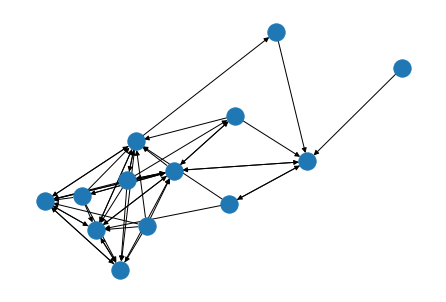

In [18]:
networkx.draw(friendship1) # don't mind any warnings

Maybe a better layout (positioning of nodes) helps.

In [19]:
coords = networkx.kamada_kawai_layout(friendship1) # more on layouts below

This should look nicer.

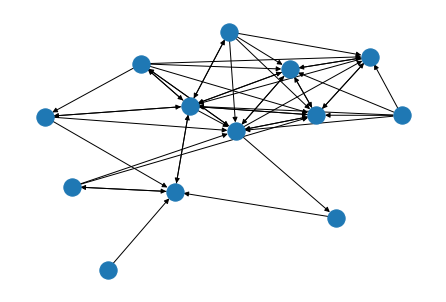

In [20]:
networkx.draw(friendship1, 
              pos = coords)

## 3. Node centrality

It is easy to calculate different centralities in NetworkX.

For example, here is indegree, the number of incoming edges/ties:

In [21]:
friendship1_indegree = networkx.in_degree_centrality(friendship1)
friendship1_indegree

{'realDonaldTrump': 0.6666666666666666,
 'senatemajldr': 0.08333333333333333,
 'VP': 0.6666666666666666,
 'WhiteHouse': 0.5833333333333333,
 'Mike_Pence': 0.6666666666666666,
 'TeamTrump': 0.16666666666666666,
 'seanhannity': 0.41666666666666663,
 'CLewandowski_': 0.16666666666666666,
 'FLOTUS': 0.5,
 'GreggJarrett': 0.08333333333333333,
 'marklevinshow': 0.08333333333333333,
 'BreitbartNews': 0.0,
 'OANN': 0.0}

This is normalized by the number of nodes and means the proportion of
others who think a given student is their friend. To get the actual number of
friendship nominations, you have to multiple each centrality by n_nodes-1.

In [29]:
n_nodes = len(friendship1.nodes())

for i in friendship1_indegree: # we do this in a for loop
    friendship1_indegree[i] = int(friendship1_indegree[i] * (n_nodes-1))
friendship1_indegree # we get nice integeres - the number of incoming ties

{'realDonaldTrump': 194688,
 'senatemajldr': 24336,
 'VP': 194688,
 'WhiteHouse': 146016,
 'Mike_Pence': 194688,
 'TeamTrump': 48672,
 'seanhannity': 121680,
 'CLewandowski_': 48672,
 'FLOTUS': 146016,
 'GreggJarrett': 24336,
 'marklevinshow': 24336,
 'BreitbartNews': 0,
 'OANN': 0}

We can do the same for outdegree, the number of outgoing edges/ties.

In [30]:
friendship1_outdegree = networkx.out_degree_centrality(friendship1)
friendship1_outdegree

{'realDonaldTrump': 0.5833333333333333,
 'senatemajldr': 0.41666666666666663,
 'VP': 0.3333333333333333,
 'WhiteHouse': 0.3333333333333333,
 'Mike_Pence': 0.41666666666666663,
 'TeamTrump': 0.5,
 'seanhannity': 0.16666666666666666,
 'CLewandowski_': 0.25,
 'FLOTUS': 0.25,
 'GreggJarrett': 0.25,
 'marklevinshow': 0.08333333333333333,
 'BreitbartNews': 0.08333333333333333,
 'OANN': 0.41666666666666663}

This is also a proportion, so we can do the samse as above.

In [31]:
for i in friendship1_outdegree:
    friendship1_outdegree[i] = int(friendship1_outdegree[i] * (n_nodes-1))
friendship1_outdegree # the number of friendship ties sent by each student

{'realDonaldTrump': 6,
 'senatemajldr': 5,
 'VP': 4,
 'WhiteHouse': 4,
 'Mike_Pence': 5,
 'TeamTrump': 6,
 'seanhannity': 2,
 'CLewandowski_': 3,
 'FLOTUS': 3,
 'GreggJarrett': 3,
 'marklevinshow': 1,
 'BreitbartNews': 1,
 'OANN': 5}

How are the in- and outdegrees distributed? We can put them on histograms.

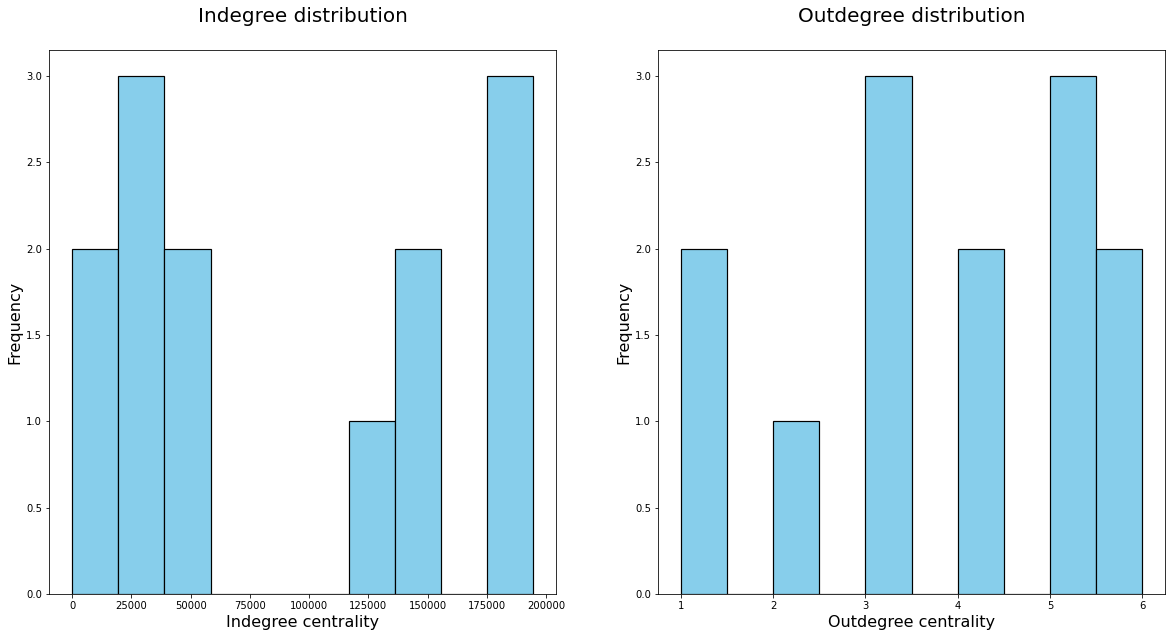

In [36]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.hist(friendship1_indegree.values(),
         color = 'skyblue', 
         edgecolor = 'black', 
         linewidth = 1.2)
plt.title("Indegree distribution\n", fontsize=20)
plt.xlabel("Indegree centrality", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.subplot(1, 2, 2)
plt.hist(friendship1_outdegree.values(),
         color = 'skyblue', 
         edgecolor = 'black', 
         linewidth = 1.2)
plt.title("Outdegree distribution\n", fontsize=20)
plt.xlabel("Outdegree centrality", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

# plt.savefig('Figure2_degrees.pdf')

Note: the second plot looks weird, because the outdegrees are quite low;
      you can also experiment with using bar charts; see help(plt.bar).

We can also calculate other known centrality measures:

In [37]:
friendship1_betweenness = networkx.betweenness_centrality(friendship1)
friendship1_closeness = networkx.closeness_centrality(friendship1)
friendship1_eigenvector = networkx.eigenvector_centrality(friendship1)
friendship1_pagerank = networkx.pagerank(friendship1)

Perhaps more interestingly for now, we can add centrality information to 
our network plot.

We define a node size object that is proportional to student indegree.

In [38]:
sizes = [v**3+70 for v in friendship1_indegree.values()] # a monotonic transformation

In [55]:
sizes = [v/25 for v in friendship1_indegree.values()]

See help(networkx.draw_networkx) for the default node size value.

Adding variable node sizes to the plot is now easy:

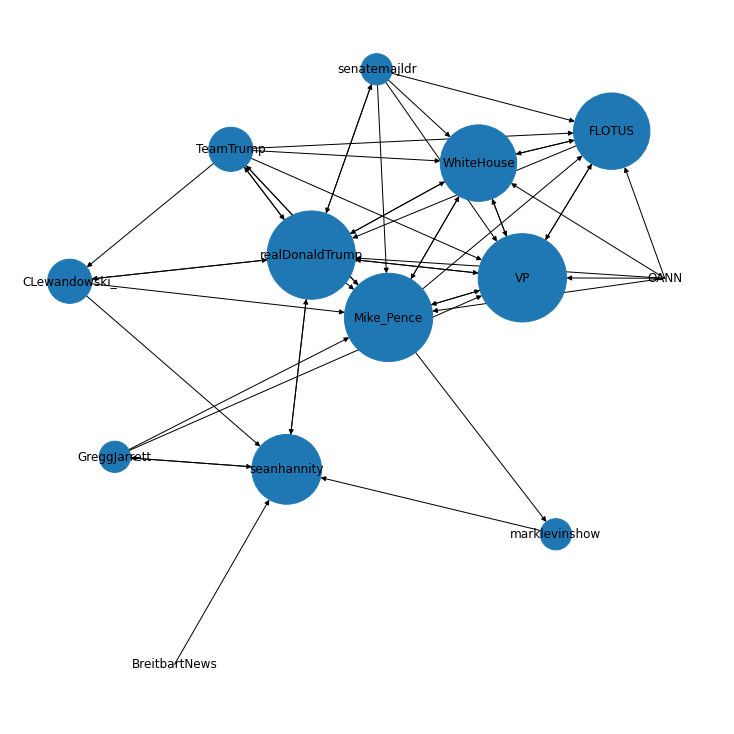

In [58]:
plt.figure(figsize=(10,10))
networkx.draw(friendship1,
              with_labels = True,
              pos = coords,
              node_size = sizes)
plt.savefig('trump_network.png')